In [1]:
!pip install --upgrade --force-reinstall xlrd


     |████████████████████████████████| 96 kB 4.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Mission 1 :Exploration des données 


Ce fichier contient les données de la World Income Distribution, datée de 2008.
Cette base de données est composée principalement d'études réalisées au niveau national pour bon nombre de pays, et contient les distributions de revenus des populations concernées.

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Projet7/data-projet7.csv')

In [5]:
data.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297


In [6]:
# vérification des doublons
data.duplicated().sum()

0

### Années des données :

In [7]:
# je regarde les dates
data['year_survey'].unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004])

In [8]:
#on regarde les data types pour pouvoir travailler avec 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       11599 non-null  object
 1   year_survey   11599 non-null  int64 
 2   quantile      11599 non-null  int64 
 3   nb_quantiles  11599 non-null  int64 
 4   income        11599 non-null  object
 5   gdpppp        11399 non-null  object
dtypes: int64(3), object(3)
memory usage: 543.8+ KB


In [9]:
#je transforme les revenus en numérique
data['income'] =data['income'].str.replace(',', '.').astype(float)


In [10]:
#je transforme le gddp en numérique
data['gdpppp']= data['gdpppp'].str.replace(',', '.').astype(float)

In [11]:
data.describe(include = 'all')

,country,year_survey,quantile,nb_quantiles,income,gdpppp
count,11599,11599.000000,11599.000000,11599.0,11599.000000,1.139900e+04
unique,116,NaN,NaN,NaN,NaN,NaN
top,ALB,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.982757,50.500819,100.0,6069.224260,5.022128e+04
std,NaN,0.909633,28.868424,0.0,9414.185972,4.000688e+05
min,NaN,2004.000000,1.000000,100.0,16.719418,3.031931e+02
25%,NaN,2008.000000,25.500000,100.0,900.685515,2.576000e+03
50%,NaN,2008.000000,51.000000,100.0,2403.244900,7.560000e+03
75%,NaN,2008.000000,75.500000,100.0,7515.420900,1.877300e+04


chaque pays à 100 lignes ( 1 ligne par quantile) il y a un pays à qui il manque une ligne 


In [12]:
#on va regarder la moyenne des quantiles 
data.pivot_table(index='country').sort_values(by='quantile')

,gdpppp,income,nb_quantiles,quantile,year_survey
country,,,,,
ALB,7297.0000,2994.829902,100,50.50000,2008
PAN,11767.0000,5135.139376,100,50.50000,2009
PAK,2335.0000,887.839279,100,50.50000,2008
NPL,1048.1808,914.391651,100,50.50000,2010
NOR,49070.0000,22483.375020,100,50.50000,2008
...,...,...,...,...,...
EST,18773.0000,7702.062593,100,50.50000,2008
ESP,28336.0000,13116.992910,100,50.50000,2008
HRV,17219.0000,7716.465790,100,50.50000,2008


In [13]:
#regardons la lituanie 
data_lituanie = data[data['country']=='LTU']

In [14]:
pd.set_option('display.max_row', None)
#data_lituanie

il manque la ligne 41
on va l'ajouter en faisant la moyenne entre la ligne 40 et 42


In [15]:
data_lituanie40_42 = data_lituanie[data_lituanie['quantile'].isin([40,42])]

In [16]:
data_lituanie40_42

,country,year_survey,quantile,nb_quantiles,income,gdpppp
6239,LTU,2008,40,100,4868.4507,17571.0
6240,LTU,2008,42,100,4895.8306,17571.0


In [17]:
data_lituanie41 = data_lituanie40_42.pivot_table(index = 'country').reset_index()

In [18]:
data_lituanie41

,country,gdpppp,income,nb_quantiles,quantile,year_survey
0,LTU,17571.0,4882.14065,100,41,2008


In [19]:
data = pd.concat([data.iloc[:6240], data_lituanie41, data[6240:]]).reset_index(drop=True)
data.head()


,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


In [20]:
data.iloc[[6238,6239,6240,6241]]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
6238,LTU,2008,39,100,4802.36800,17571.0
6239,LTU,2008,40,100,4868.45070,17571.0
6240,LTU,2008,41,100,4882.14065,17571.0
6241,LTU,2008,42,100,4895.83060,17571.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11600 non-null  object 
 1   year_survey   11600 non-null  int64  
 2   quantile      11600 non-null  int64  
 3   nb_quantiles  11600 non-null  int64  
 4   income        11600 non-null  float64
 5   gdpppp        11400 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.9+ KB


On a bien 11600 lignes

 ## Les Valeurs manquantes 

In [22]:
data.isna().values.any()

True

In [23]:
data.isna().sum()

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64

In [24]:
missing_values= data[data['gdpppp'].isnull()] # Individus aux gdpppp manquants

Les valeurs manquantes sont dans la colonne gdppp

On a deux pays avec les gdpppp manquantes : kosovo et Palestine

In [25]:
len(data)

11600

In [26]:
print(round(len(missing_values) / len(data) * 100, 1), '% du dataset')

1.7 % du dataset



Etant donné que ces pays representent à peine 1,7% du dataset on choisi de les supprimer



In [27]:
#supprime les 2 pays
data.drop(missing_values.index,inplace = True)

In [28]:
data.isna().sum()

country         0
year_survey     0
quantile        0
nb_quantiles    0
income          0
gdpppp          0
dtype: int64

In [29]:
gini = pd.read_csv('/content/drive/MyDrive/Projet7/gini.csv')

In [30]:
gini.head()

,Series Name,Series Code,Country Name,Country Code,2008 [YR2008]
0,Gini index (World Bank estimate),SI.POV.GINI,Afghanistan,AFG,..
1,Gini index (World Bank estimate),SI.POV.GINI,Albania,ALB,30
2,Gini index (World Bank estimate),SI.POV.GINI,Algeria,DZA,..
3,Gini index (World Bank estimate),SI.POV.GINI,American Samoa,ASM,..
4,Gini index (World Bank estimate),SI.POV.GINI,Andorra,AND,..


## Calcul des données manquantes de l'indice de Gini à partir des données de la World Distribution
L'indice (ou coefficient) de Gini est un indicateur synthétique permettant de rendre compte du niveau d'inégalité pour une variable et sur une population donnée. Il varie entre 0 (égalité parfaite) et 1 (inégalité extrême). Entre 0 et 1, l'inégalité est d'autant plus forte que l'indice de Gini est élevé.

In [31]:
# creation d'une fonction qui calcule pour tous les pays 
def gini(data):
    #dataframe pour mettre nos nouvelles données
    dt_gini = pd.DataFrame(columns =['country','gini'])
    
    for c in data.country.unique():
        dt = data[data['country']==c].reset_index()
        income = dt['income'].values
        n = len(income)
        lorenz = np.cumsum(np.sort(income) / income.sum())
        lorenz = np.append([0],lorenz)
        AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
        S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
        gini = 2*S
        df= pd.DataFrame({'country':[dt['country'][0]],'gini':gini})
        dt_gini = pd.concat([dt_gini,df])
    return dt_gini


In [32]:
test = data.groupby(['year_survey']).apply(gini).reset_index().drop(['level_1'], axis = 1)

In [33]:
test[test['year_survey']== 2008].head()

,year_survey,country,gini
21,2008,ALB,0.304624
22,2008,ARG,0.449902
23,2008,ARM,0.263108
24,2008,AUT,0.278279
25,2008,AZE,0.312321


In [34]:
#je verifie qu'il n'ya pas plusieurs indices de Gini pour un pays à des dates différentes
test.country.value_counts()

SYR    1
SVK    1
SLV    1
RUS    1
ROU    1
PRY    1
PRT    1
POL    1
PER    1
PAK    1
NOR    1
NLD    1
MRT    1
MOZ    1
MNE    1
MKD    1
MEX    1
MDA    1
LVA    1
LUX    1
LTU    1
KOR    1
KHM    1
KGZ    1
KAZ    1
JPN    1
JOR    1
SRB    1
SVN    1
GHA    1
SWE    1
NPL    1
NGA    1
MWI    1
MLI    1
MDG    1
BGD    1
UGA    1
TJK    1
SWZ    1
SDN    1
PAN    1
NIC    1
MYS    1
IDN    1
EGY    1
CHL    1
BFA    1
COD    1
ZAF    1
YEM    1
USA    1
URY    1
UKR    1
TWN    1
TUR    1
ITA    1
ISR    1
ISL    1
IRQ    1
BEL    1
AZE    1
AUT    1
ARM    1
ARG    1
ALB    1
TZA    1
TLS    1
NER    1
MNG    1
MAR    1
LKA    1
LBR    1
LAO    1
KEN    1
IND    1
GIN    1
CMR    1
CHN    1
BTN    1
BIH    1
VNM    1
VEN    1
THA    1
PHL    1
BGR    1
BLR    1
BOL    1
EST    1
IRN    1
IRL    1
HUN    1
HRV    1
HND    1
GRC    1
GEO    1
GBR    1
FRA    1
FJI    1
FIN    1
ESP    1
BRA    1
ECU    1
DOM    1
DNK    1
DEU    1
CZE    1
CYP    1
CRI    1
COL    1
CIV    1
C

In [35]:
#je calcule les indices d egini avec ma fonction
test = gini(data)

In [36]:
test.head()

,country,gini
0,ALB,0.304624
0,ARG,0.449902
0,ARM,0.263108
0,AUT,0.278279
0,AZE,0.312321


In [37]:
#on fait un join avec le dataframe data
df = pd.merge(data,test, on='country',how = 'left')

In [38]:
df.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini
0,ALB,2008,1,100,728.89795,7297.0,0.304624
1,ALB,2008,2,100,916.66235,7297.0,0.304624
2,ALB,2008,3,100,1010.91600,7297.0,0.304624
3,ALB,2008,4,100,1086.90780,7297.0,0.304624
4,ALB,2008,5,100,1132.69970,7297.0,0.304624


## Nombre d'habitants

In [39]:
#on recupère le nombre d'habitants
df_population = pd.read_csv('/content/drive/MyDrive/Projet7/population.csv')

In [40]:
df_population.head()

,Country Name,Country Code,Series Name,Series Code,2008 [YR2008]
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,27722281
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,491173160
2,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,331772330
3,Albania,ALB,"Population, total",SP.POP.TOTL,2947314
4,Algeria,DZA,"Population, total",SP.POP.TOTL,34730604


In [41]:
#prends les colonnes qui nous interessent
df_population = df_population[['Country Code','2008 [YR2008]']]

In [42]:
df_population.head()

,Country Code,2008 [YR2008]
0,AFG,27722281
1,AFE,491173160
2,AFW,331772330
3,ALB,2947314
4,DZA,34730604


In [43]:
#je renomme les colonnes
df_population = df_population.rename(columns={'Country Code':'country','2008 [YR2008]':'population2008'})

In [44]:
#on fait un join avec le dataframe df
df = pd.merge(df,df_population, on='country',how = 'left')

In [45]:
#df.country.value_counts()

In [46]:
df.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,population2008
0,ALB,2008,1,100,728.89795,7297.0,0.304624,2947314
1,ALB,2008,2,100,916.66235,7297.0,0.304624,2947314
2,ALB,2008,3,100,1010.91600,7297.0,0.304624,2947314
3,ALB,2008,4,100,1086.90780,7297.0,0.304624,2947314
4,ALB,2008,5,100,1132.69970,7297.0,0.304624,2947314


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11400 entries, 0 to 11399
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         11400 non-null  object 
 1   year_survey     11400 non-null  int64  
 2   quantile        11400 non-null  int64  
 3   nb_quantiles    11400 non-null  int64  
 4   income          11400 non-null  float64
 5   gdpppp          11400 non-null  float64
 6   gini            11400 non-null  float64
 7   population2008  11300 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 801.6+ KB


In [48]:
# verifie valeurs manquantes
df.isna().sum()

country             0
year_survey         0
quantile            0
nb_quantiles        0
income              0
gdpppp              0
gini                0
population2008    100
dtype: int64

On a 100 lignes avec des valeurs manquantes 

In [49]:
df[df['population2008'].isnull()]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,population2008
10300,TWN,2008,1,100,3477.1800,25342.0,0.314801,NaN
10301,TWN,2008,2,100,4740.2637,25342.0,0.314801,NaN
10302,TWN,2008,3,100,5331.3013,25342.0,0.314801,NaN
10303,TWN,2008,4,100,5761.6577,25342.0,0.314801,NaN
10304,TWN,2008,5,100,6093.2017,25342.0,0.314801,NaN
10305,TWN,2008,6,100,6406.4414,25342.0,0.314801,NaN
10306,TWN,2008,7,100,6659.2026,25342.0,0.314801,NaN
10307,TWN,2008,8,100,6918.4180,25342.0,0.314801,NaN
10308,TWN,2008,9,100,7112.2593,25342.0,0.314801,NaN
10309,TWN,2008,10,100,7308.3813,25342.0,0.314801,NaN


C'est le pays Taiwan qui n'a pas de population

In [50]:
#supression de Taiwan
df.dropna(inplace=True)

In [51]:
df.isna().sum()

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp            0
gini              0
population2008    0
dtype: int64

## Mission 1: Les données utilisées

Résumez les données utilisées :
année(s) des données utilisées ;
nombre de pays présents ;
population couverte par l'analyse (en termes de pourcentage de la population mondiale).


Les données de la World Income Distribution présentent pour chaque pays les quantiles de la distribution des revenus de leur population respective.
De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ?
Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?

In [52]:
#resumé des données utilisées
df.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp,gini
count,11300.000000,11300.000000,11300.0,11300.000000,1.130000e+04,11300.000000
mean,2007.973451,50.500000,100.0,6055.111080,5.043856e+04,0.380317
std,0.916557,28.867347,0.0,9408.220141,4.018108e+05,0.090133
min,2004.000000,1.000000,100.0,16.719418,3.031931e+02,0.230731
25%,2008.000000,25.750000,100.0,895.653925,2.576000e+03,0.307419
50%,2008.000000,50.500000,100.0,2418.683450,7.560000e+03,0.361919
75%,2008.000000,75.250000,100.0,7469.830600,1.800400e+04,0.440511
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06,0.669779


In [53]:
#regarde le nombre de pays
df.country.unique()

array(['ALB', 'ARG', 'ARM', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR',
       'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHL', 'CHN',
       'CIV', 'CMR', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM',
       'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO',
       'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KOR', 'LAO', 'LBR', 'LKA', 'LTU', 'LUX',
       'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE', 'MNG',
       'MOZ', 'MRT', 'MWI', 'MYS', 'NER', 'NGA', 'NIC', 'NLD', 'NOR',
       'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'ROU',
       'RUS', 'SDN', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'SWZ', 'SYR',
       'THA', 'TJK', 'TLS', 'TUR', 'TZA', 'UGA', 'UKR', 'URY', 'USA',
       'VEN', 'VNM', 'YEM', 'ZAF', 'COD'], dtype=object)

In [54]:
df.country.describe()

count     11300
unique      113
top         ALB
freq        100
Name: country, dtype: object

In [55]:
df.population2008.describe()

count       11300
unique        113
top       2947314
freq          100
Name: population2008, dtype: object

In [56]:
#regarde la population est de quel type 
df['population2008'].unique()

array(['2947314', '40080159', '2907615', '8321496', '8763400', '10709973',
       '14689725', '144304164', '7492561', '3754261', '9527985',
       '9721457', '192030362', '671611', '4273368', '33247118',
       '16708255', '1324655000', '19605568', '19252674', '44254972',
       '4463123', '1081568', '10384603', '82110097', '5493621', '9458079',
       '14535740', '79636081', '45954106', '1337090', '5313399', '845356',
       '64374979', '61806995', '3848449', '23563832', '9738796',
       '11077841', '13739299', '7980955', '4309705', '10038188',
       '235469755', '1200669762', '4489544', '72120608', '28385739',
       '317414', '7308800', '58826731', '6556473', '128063000',
       '15776938', '39791984', '5318700', '13883835', '49054708',
       '6046630', '3607863', '19983984', '3198231', '488650', '2177322',
       '31536807', '2867964', '19996476', '110815272', '2046898',
       '14113578', '616969', '2631899', '22276596', '3296237', '13727899',
       '27236003', '15250913', '15

In [57]:
#transformation de la population en numeric
df['population2008']= df['population2008'].astype(float)

In [58]:
df.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,population2008
0,ALB,2008,1,100,728.89795,7297.0,0.304624,2947314.0
1,ALB,2008,2,100,916.66235,7297.0,0.304624,2947314.0
2,ALB,2008,3,100,1010.91600,7297.0,0.304624,2947314.0
3,ALB,2008,4,100,1086.90780,7297.0,0.304624,2947314.0
4,ALB,2008,5,100,1132.69970,7297.0,0.304624,2947314.0


In [59]:
#je crée un tableau juste avec la population
df_pop = df[['country','population2008']].drop_duplicates().reset_index(drop=True)

In [60]:
df_pop.head()

,country,population2008
0,ALB,2947314.0
1,ARG,40080159.0
2,ARM,2907615.0
3,AUT,8321496.0
4,AZE,8763400.0


In [61]:
df_pop.shape

(113, 2)

In [62]:
#Je fais la somme
df_pop.population2008.sum()

6175485584.0

In [63]:
df['population2008'].unique().dtype

dtype('float64')

In [64]:
#calcule la population par pays
df_groupe = df.groupby(['country','population2008']).sum().reset_index()

In [65]:
df_groupe.head()

,country,population2008,year_survey,quantile,nb_quantiles,income,gdpppp,gini
0,ALB,2947314.0,200800,5050,10000,2.994830e+05,729700.0,30.462429
1,ARG,40080159.0,200800,5050,10000,5.847885e+05,1322000.0,44.990165
2,ARM,2907615.0,200800,5050,10000,1.628383e+05,561100.0,26.310763
3,AUT,8321496.0,200800,5050,10000,1.663760e+06,3619300.0,27.827911
4,AZE,8763400.0,200800,5050,10000,2.357429e+05,810100.0,31.232118


In [66]:
#afficher les nombres en entier 
pd.options.display.float_format = '{:.2f}'.format

In [67]:
 df_groupe['population2008'].astype(float).sum()
    

6175485584.0

In [68]:
#pourcentage de la population étudiée par rapport à la population globale 
pourcentage = (6175485584/6674000000)* 100 

In [69]:
pourcentage


92.53050020976926

Nous étudions des données de 113 pays 
La population étudiée ic est de 6 miliards 175 millions 485 mille  d'habitants 
La population estimé en 2008  est de 6 milliard  674 millions (banque mondiale), soit 92,53% de la population mondiale en 2008

*Les données de la World Income Distribution présentent pour chaque pays les quantiles de la distribution des revenus de leur population respective.
De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ?
Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?*

Les quantiles qui sont utilisé ici sont des centiles . 

les quantiles sont les valeurs qui divisent un jeu de données en intervalles contenant le même nombre de données.

Les quantiles sont des mesures utiles parce qu'elles sont moins sensibles aux distributions allongées et aux valeurs aberrantes. (pas trop compris)

*L'unité utilisée dans la colonne income de la world income distribution est le $PPP. Cette unité est calculée par la Banque mondiale, selon la méthode Eltöte-Köves-Szulc. Après vous être documenté, vous expliquerez à votre mentor très brièvement à quoi correspond cette unité et pourquoi elle est pertinente pour une comparaison de pays différents*

PPP est le GDP PER CAPITA en parité de pouvoir d'achat .Permet une meilleure comparaison entre les pays 

**## Mission 2** Inegalités dans les pays

*Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique*. 

*Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.*


*Représentez la courbe de Lorenz de chacun des pays choisis.*


*Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.
Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?*

In [70]:
#je fais un data frame avec uniquement les valeur de gini et les pays
df_gini = df[['country','gini']].drop_duplicates().reset_index(drop=True)

In [71]:
df_gini.head()

,country,gini
0,ALB,0.30
1,ARG,0.45
2,ARM,0.26
3,AUT,0.28
4,AZE,0.31


In [72]:
#je classe les pays par indice de Gini 
df_gini = df_gini.sort_values(by=['gini'],ascending = False)

In [73]:
df_gini.head()

,country,gini
111,ZAF,0.67
40,HND,0.60
20,COL,0.57
39,GTM,0.57
14,CAF,0.56


In [74]:
#je remet l'index en fonction de l'indice du Gini 
df_gini = df_gini.reset_index(drop = True)

In [75]:
df_gini.head()

,country,gini
0,ZAF,0.67
1,HND,0.60
2,COL,0.57
3,GTM,0.57
4,CAF,0.56


In [76]:
# les 5 pays avec l'indice de gini le plus fort
df_gini['country'].head(5)

0    ZAF
1    HND
2    COL
3    GTM
4    CAF
Name: country, dtype: object

In [77]:
# les 5 pays avec l'indice de gini le plus faible
df_gini['country'].tail(5)

108    UKR
109    SWE
110    CZE
111    SVK
112    SVN
Name: country, dtype: object

In [78]:
# jecherche la France
df_gini.loc[df_gini['country']== 'FRA']

,country,gini
75,FRA,0.33



La France est en 75 ème position

In [79]:
#je cherche un pays au milieu 
df_gini.iloc[57]

country    PRT
gini      0.36
Name: 57, dtype: object

In [80]:
# jecherche les US
df_gini.loc[df_gini['country']== 'USA']

,country,gini
31,USA,0.43


In [81]:
#je cherche la Chine
df_gini.loc[df_gini['country']== 'CHN']

,country,gini
16,CHN,0.48


## Graphiques revenus moyens par classe

In [82]:
#on choisi 5 pays 
stud_countries = ['USA','ZAF','FRA','SVN','PRT','CHN']
dt_stud_countries = df[df['country'].isin(stud_countries)]
dt_stud_countries.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,population2008
1700,CHN,2007,1,100,16.72,5712.00,0.48,1324655000.00
1701,CHN,2007,2,100,234.15,5712.00,0.48,1324655000.00
1702,CHN,2007,3,100,282.89,5712.00,0.48,1324655000.00
1703,CHN,2007,4,100,323.83,5712.00,0.48,1324655000.00
1704,CHN,2007,5,100,362.26,5712.00,0.48,1324655000.00


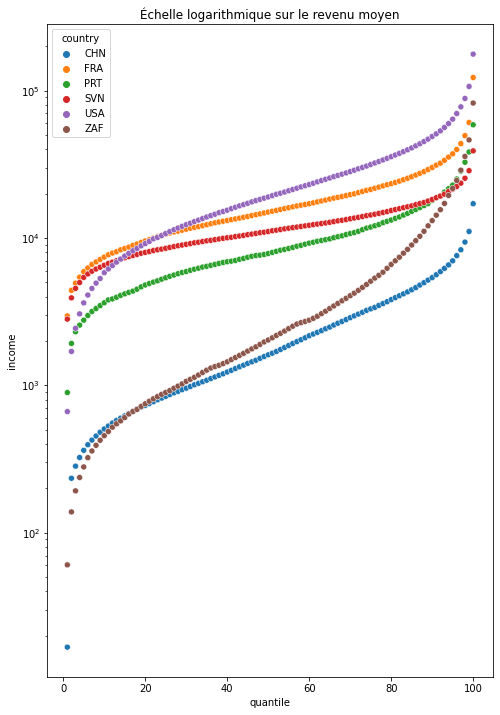

In [83]:
fig = plt.figure(figsize=(8, 12))
ax = sns.scatterplot(
    data=dt_stud_countries, x='quantile', y='income', 
    hue='country')
ax.set(yscale="log") # échelle logarithmique sur le revenu moyen (axe des ordonnées)
plt.title('Échelle logarithmique sur le revenu moyen')
fig.savefig('revenu-moyen-logarithme')
plt.show()

## Courbes de Lorenz

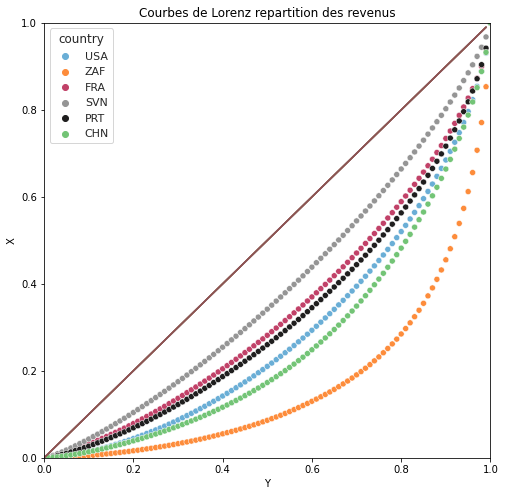

In [84]:
def lorenz(pays,couleur):

    variable = dt_stud_countries[dt_stud_countries['country']==pays]['income']    
    X = np.sort(variable.values)
 
    a = np.arange(0,1,.01) # Diagonale
    x = a
    y = a  
    sns.lineplot(x=x,y=y)
    
    sns.set(rc={'figure.figsize':(8,8)})
    sns.set_style('whitegrid')
    plt.xlim([0,1])
    plt.ylim([0,1])

    X_lorenz = X.cumsum() / X.sum() # Courbe de Lorenz
    X_lorenz = np.insert(X_lorenz, 0, 0)
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    lorenz['country'] = pays
    sns.scatterplot(data=lorenz, x='Y', y='X', hue='country',palette= couleur)

fig = plt.figure(figsize=(8, 8))
couleur = ['Blues','Oranges','flare','Greys','icefire','Greens']

for i in range(0, len(stud_countries)):
    lorenz(stud_countries[i],couleur[i])
    
plt.title('Courbes de Lorenz repartition des revenus')
fig.savefig('lorenz')

Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.



In [85]:
#telechargement de l'évolution de Gini 
evol_gini = pd.read_csv('/content/drive/MyDrive/Projet7/evol_gini.csv',skiprows = 4)
evol_gini.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Indice GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AFE,Indice GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Indice GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,AFW,Indice GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Indice GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.30,NaN,NaN,NaN


In [86]:
evol_gini.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [87]:
stud_countries

['USA', 'ZAF', 'FRA', 'SVN', 'PRT', 'CHN']

In [88]:
evol_gini['Country Code']

0      ABW
1      AFE
2      AFG
3      AFW
4      AGO
5      ALB
6      AND
7      ARB
8      ARE
9      ARG
10     ARM
11     ASM
12     ATG
13     AUS
14     AUT
15     AZE
16     BDI
17     BEL
18     BEN
19     BFA
20     BGD
21     BGR
22     BHR
23     BHS
24     BIH
25     BLR
26     BLZ
27     BMU
28     BOL
29     BRA
30     BRB
31     BRN
32     BTN
33     BWA
34     CAF
35     CAN
36     CEB
37     CHE
38     CHI
39     CHL
40     CHN
41     CIV
42     CMR
43     COD
44     COG
45     COL
46     COM
47     CPV
48     CRI
49     CSS
50     CUB
51     CUW
52     CYM
53     CYP
54     CZE
55     DEU
56     DJI
57     DMA
58     DNK
59     DOM
60     DZA
61     EAP
62     EAR
63     EAS
64     ECA
65     ECS
66     ECU
67     EGY
68     EMU
69     ERI
70     ESP
71     EST
72     ETH
73     EUU
74     FCS
75     FIN
76     FJI
77     FRA
78     FRO
79     FSM
80     GAB
81     GBR
82     GEO
83     GHA
84     GIB
85     GIN
86     GMB
87     GNB
88     GNQ
89     GRC
90     GRD

In [89]:
evol_gini = evol_gini.loc[evol_gini['Country Code'].isin(stud_countries),:]

In [90]:
evol_gini

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
40,Chine,CHN,Indice GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.20,NaN,NaN,NaN,NaN,NaN,35.20,NaN,NaN,38.70,NaN,NaN,42.00,NaN,NaN,40.90,NaN,NaN,43.00,NaN,43.70,42.40,42.20,39.70,39.20,38.60,38.50,NaN,NaN,NaN,NaN,NaN
77,France,FRA,Indice GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.20,NaN,NaN,NaN,NaN,NaN,36.90,NaN,NaN,NaN,NaN,32.20,NaN,NaN,NaN,NaN,32.30,NaN,NaN,NaN,NaN,NaN,31.10,NaN,NaN,31.40,30.60,29.80,29.70,32.40,33.00,32.70,33.70,33.30,33.10,32.50,32.30,32.70,31.90,31.60,32.40,NaN,NaN,NaN
194,Portugal,PRT,Indice GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.80,38.90,38.50,38.10,36.80,36.60,34.90,35.80,36.30,36.00,36.20,35.60,35.50,35.20,33.80,33.50,NaN,NaN,NaN
222,Slovénie,SVN,Indice GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.80,24.60,24.40,24.40,23.70,24.80,24.90,24.90,25.60,26.20,25.70,25.40,24.80,24.20,24.60,NaN,NaN,NaN
251,États-Unis,USA,Indice GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.30,NaN,NaN,NaN,NaN,34.50,NaN,NaN,NaN,NaN,NaN,NaN,37.40,NaN,NaN,NaN,NaN,38.00,38.40,40.40,40.00,39.90,40.30,40.50,40.00,40.00,40.10,40.60,40.40,40.80,40.30,41.00,41.40,40.80,40.80,40.60,40.00,40.90,40.90,40.70,41.50,41.20,41.10,41.20,41.40,NaN,NaN,NaN
263,Afrique du Sud,ZAF,Indice GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.30,NaN,NaN,60.70,NaN,NaN,NaN,57.80,NaN,NaN,NaN,NaN,64.80,NaN,NaN,63.00,NaN,63.40,NaN,NaN,NaN,63.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
years = ['Country Code','2005','2006','2007','2008','2009','2010','2011','2012','2013']

In [92]:
evol_gini = evol_gini[years]

In [93]:
evol_gini

,Country Code,2005,2006,2007,2008,2009,2010,2011,2012,2013
40,CHN,40.90,NaN,NaN,43.00,NaN,43.70,42.40,42.20,39.70
77,FRA,29.80,29.70,32.40,33.00,32.70,33.70,33.30,33.10,32.50
194,PRT,38.50,38.10,36.80,36.60,34.90,35.80,36.30,36.00,36.20
222,SVN,24.60,24.40,24.40,23.70,24.80,24.90,24.90,25.60,26.20
251,USA,41.00,41.40,40.80,40.80,40.60,40.00,40.90,40.90,40.70
263,ZAF,64.80,NaN,NaN,63.00,NaN,63.40,NaN,NaN,NaN


In [94]:
test = pd.melt(evol_gini, id_vars=['Country Code'], value_vars=['2005','2006','2007','2008','2009','2010','2011','2012','2013'])

In [95]:
test.head()

,Country Code,variable,value
0,CHN,2005,40.90
1,FRA,2005,29.80
2,PRT,2005,38.50
3,SVN,2005,24.60
4,USA,2005,41.00


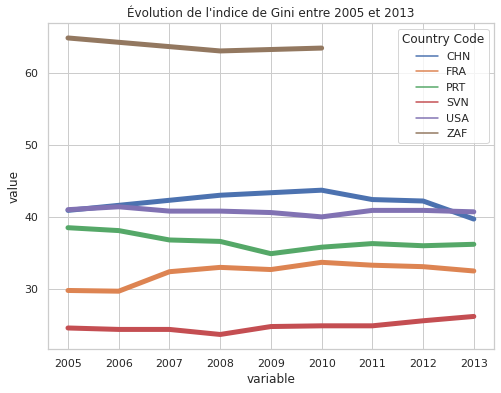

In [96]:
fig = plt.figure(figsize=(8, 6))
sns.lineplot(data = test, x='variable', y='value', hue='Country Code', linewidth=5)

plt.title("Évolution de l'indice de Gini entre 2005 et 2013")
fig.savefig('evolution_gini')
plt.show()

## Mission 3

Dans l'état actuel, nous avons à disposition deux des trois variables explicatives souhaitées : le revenu moyen du pays
l'indice de Gini du pays
Il nous manque donc, pour un individu , la classe de revenu de ses parents.
Nous allons donc simuler cette information grâce à un coefficient (propre à chaque pays ) mesurant une corrélation entre le revenu de l'individu et le revenu de ses parents. Ce coefficient sera ici appelé coefficient d'élasticité., il mesure la mobilité intergénérationnelle du revenu.
Nous supposons ici que l'on associe à chaque individu une unique classe ; quel que soit le nombre de parents de .
Pour plus d'informations sur le calcul du coefficient d'élasticité, consulter ce document, notamment l'équation 1 de la page 8). Ce coefficient est déterminé par une régression linéaire simple dans laquelle le logarithme du revenu de l'enfant est une fonction du logarithme du revenu des parents :
 Pour obtenir le coefficient d'élasticité, deux possibilités s'offrent à vous :


In [97]:
# lecture du Global Database On Intergenerational Mobility
df_GDIM = pd.read_csv('/content/drive/MyDrive/Projet7/GDIMMay2018.csv')

In [98]:
pd.set_option('display.max_columns', None)
df_GDIM.head()

,countryname,wbcode,iso3,region,incgroup2,incgroup4,fragile,survey,year,status,cohort,parent,child,obs,P1,P2,P3,P4,P5,C1,C2,C3,C4,C5,MEANp,MEANc,SDp,SDc,GINIp,GINIc,IGP,NL1,NL2,COR,MAcatM,MAcatC1,Q4_IGpri,BHQ1,BHQ2,BHQ3,BHQ4,Q4BH,Q4child,Delta50,Asher_Q4_IGpri,ThreeGen_obs,ThreeGen_IGPp1,ThreeGen_IGPg1,ThreeGen_IGPgsd,All2125_MEANp,All2125_MEANc,All2125_IGP,All2125_MAcatC1,Cores2125_MEANp,Cores2125_MEANc,Cores2125_IGP,Cores2125_MAcatC1,Shortfall0611_obs,Shortfall0611_IGP,Shortfall1217_obs,Shortfall1217_IGP,IGEincome,S1,S2,S3,MLD_psu
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,1980,avg,all,3956.00,0.67,0.10,0.17,0.04,0.02,0.51,0.03,0.16,0.18,0.11,2.48,5.58,3.81,5.86,0.73,0.57,0.80,1.08,-0.03,0.52,0.42,0.41,0.57,0.34,0.33,0.21,0.12,0.16,0.25,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25103.00,0.09,18054.00,0.35,NaN,NaN,NaN,NaN,0.10
1,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,1980,avg,daughter,721.00,0.62,0.10,0.21,0.05,0.02,0.63,0.02,0.10,0.13,0.12,2.99,4.33,4.01,5.90,0.68,0.68,0.85,0.90,-0.01,0.58,0.28,0.28,0.49,0.43,0.39,0.10,0.07,0.29,0.21,1.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12107.00,0.08,8538.00,0.39,NaN,NaN,NaN,NaN,0.10
2,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,1980,avg,son,3235.00,0.68,0.10,0.16,0.04,0.02,0.48,0.03,0.18,0.20,0.11,2.35,5.89,3.75,5.81,0.74,0.54,0.81,1.17,-0.03,0.52,0.45,0.45,0.60,0.32,0.31,0.23,0.13,0.12,0.26,3.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12996.00,0.09,9516.00,0.31,NaN,NaN,NaN,NaN,0.10
3,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,1980,dad,all,4137.00,0.69,0.05,0.06,0.15,0.06,0.51,0.03,0.17,0.18,0.11,3.76,5.54,5.49,5.84,0.71,0.57,0.51,0.58,-0.00,0.48,0.35,0.35,0.55,0.33,0.32,0.22,0.13,0.19,0.25,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25396.00,0.05,18387.00,0.22,NaN,NaN,NaN,NaN,0.10
4,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,1980,dad,daughter,744.00,0.64,0.05,0.05,0.19,0.06,0.63,0.02,0.10,0.13,0.11,4.52,4.28,5.80,5.87,0.66,0.68,0.49,0.55,-0.00,0.49,0.24,0.23,0.45,0.43,0.39,0.10,0.08,0.34,0.21,1.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12246.00,0.05,8677.00,0.23,NaN,NaN,NaN,NaN,0.10


In [99]:
#je regarde les colonnes
df_GDIM.columns

Index(['countryname', 'wbcode', 'iso3', 'region', 'incgroup2', 'incgroup4',
       'fragile', 'survey', 'year', 'status', 'cohort', 'parent', 'child',
       'obs', 'P1', 'P2', 'P3', 'P4', 'P5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'MEANp', 'MEANc', 'SDp', 'SDc', 'GINIp', 'GINIc', 'IGP', 'NL1', 'NL2',
       'COR', 'MAcatM', 'MAcatC1', 'Q4_IGpri', 'BHQ1', 'BHQ2', 'BHQ3', 'BHQ4',
       'Q4BH', 'Q4child', 'Delta50', 'Asher_Q4_IGpri', 'ThreeGen_obs',
       'ThreeGen_IGPp1', 'ThreeGen_IGPg1', 'ThreeGen_IGPgsd', 'All2125_MEANp',
       'All2125_MEANc', 'All2125_IGP', 'All2125_MAcatC1', 'Cores2125_MEANp',
       'Cores2125_MEANc', 'Cores2125_IGP', 'Cores2125_MAcatC1',
       'Shortfall0611_obs', 'Shortfall0611_IGP', 'Shortfall1217_obs',
       'Shortfall1217_IGP', 'IGEincome', 'S1', 'S2', 'S3', 'MLD_psu'],
      dtype='object')

In [100]:
pd.set_option('display.max_rows', None)
df_igeincome = df_GDIM[['wbcode','IGEincome']]

j'ai des lignes avec des nan et des lignes sans..


In [101]:
#  je recupère les pays avec ige qui non pas de Nan 
df_paysIGE =   df_igeincome[df_igeincome['IGEincome'].notna()] 

In [102]:
df_paysIGE.head()

,wbcode,IGEincome
60,ALB,0.82
61,ALB,0.82
62,ALB,0.82
63,ALB,0.82
64,ALB,0.82


In [103]:
#je regarde les pays qui ont un IGE  
df_paysIGE['wbcode'].unique()

array(['ALB', 'AUS', 'AUT', 'BEL', 'BEN', 'BGD', 'BIH', 'BLR', 'BOL',
       'BRA', 'CAN', 'CHE', 'CHL', 'CHN', 'COL', 'CYP', 'CZE', 'DEU',
       'DNK', 'ECU', 'EGY', 'ESP', 'ETH', 'FIN', 'FRA', 'GBR', 'GHA',
       'GIN', 'GRC', 'GTM', 'HRV', 'IND', 'IRL', 'ITA', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KGZ', 'KOR', 'LUX', 'LVA', 'MAR', 'MDG', 'MKD',
       'MLI', 'MNG', 'MWI', 'MYS', 'NGA', 'NLD', 'NOR', 'NPL', 'NZL',
       'PAK', 'PAN', 'PER', 'PRT', 'ROM', 'RUS', 'RWA', 'SGP', 'SVK',
       'SVN', 'SWE', 'TMP', 'TUN', 'TWN', 'TZA', 'UGA', 'USA', 'UZB',
       'VNM', 'ZAF', 'ZAR'], dtype=object)

In [104]:
#j'enlève les pays en double
df_pays_IGE = df_paysIGE.drop_duplicates()

In [105]:
df_pays_IGE.head()

,wbcode,IGEincome
60,ALB,0.82
183,AUS,0.28
243,AUT,0.25
351,BEL,0.18
405,BEN,0.86


In [106]:
#je renomme la colonne
df_pays_IGE = df_pays_IGE.rename(columns={'wbcode':'country'})

In [107]:
df_pays_IGE.head()

,country,IGEincome
60,ALB,0.82
183,AUS,0.28
243,AUT,0.25
351,BEL,0.18
405,BEN,0.86


 on va utiliser les elasticity globaux pour les pays qui n'ont pas de IGE 

In [108]:
#je fusionne df_gini avec df pays ige pour les pays qui ont une valeur 
df_ige = pd.merge(df_gini,df_pays_IGE ,on='country',how = 'left')


In [109]:
df_ige.head()

,country,gini,IGEincome
0,ZAF,0.67,0.68
1,HND,0.60,NaN
2,COL,0.57,1.10
3,GTM,0.57,1.02
4,CAF,0.56,NaN


In [110]:
df_ige = df_ige.drop(columns=['gini'])

In [111]:
df_ige.head()

,country,IGEincome
0,ZAF,0.68
1,HND,NaN
2,COL,1.10
3,GTM,1.02
4,CAF,NaN


In [112]:
#un excel ou j'ai remplis les gini de elasticity.txt
df_elasticity = pd.read_excel('/content/drive/MyDrive/Projet7/df_gini.xls')

In [113]:
df_elasticity.head()

,Unnamed: 0,country,gini,elasticity
0,0,ZAF,0.67,0.66
1,1,HND,0.60,0.66
2,2,COL,0.57,0.66
3,3,GTM,0.57,0.66
4,4,CAF,0.56,0.66


In [114]:
df_elasticity= df_elasticity.drop(['Unnamed: 0','gini'], axis=1)

In [115]:
df_elasticity.head()

,country,elasticity
0,ZAF,0.66
1,HND,0.66
2,COL,0.66
3,GTM,0.66
4,CAF,0.66


In [116]:
df_elasticity = df_elasticity.rename(columns={'elasticity':'IGEincome'})

In [117]:
df_ige.head()

,country,IGEincome
0,ZAF,0.68
1,HND,NaN
2,COL,1.10
3,GTM,1.02
4,CAF,NaN


In [118]:
df_elasticity.head()

,country,IGEincome
0,ZAF,0.66
1,HND,0.66
2,COL,0.66
3,GTM,0.66
4,CAF,0.66


In [119]:
df_elasticity.columns= ['country','IGEincome2']

In [120]:
df_elasticity_ige = pd.merge(df_ige,df_elasticity , on ='country',how = 'left')

In [121]:
df_elasticity_ige.head()

,country,IGEincome,IGEincome2
0,ZAF,0.68,0.66
1,HND,NaN,0.66
2,COL,1.10,0.66
3,GTM,1.02,0.66
4,CAF,NaN,0.66


In [122]:
df_elasticity_ige['IGEincome']= df_elasticity_ige.apply(lambda x: x['IGEincome2'] if pd.isnull(x['IGEincome']) else x['IGEincome'], axis = 1 )

In [123]:
df_elasticity_ige.head()

,country,IGEincome,IGEincome2
0,ZAF,0.68,0.66
1,HND,0.66,0.66
2,COL,1.10,0.66
3,GTM,1.02,0.66
4,CAF,0.66,0.66


In [124]:
df_elasticity_ige = df_elasticity_ige[['country','IGEincome']]

In [125]:
#on a un tableau qui a remplacé par les elasticity par defaut les valeurs manquantes de IGE 
df_elasticity_ige.head()

,country,IGEincome
0,ZAF,0.68
1,HND,0.66
2,COL,1.10
3,GTM,1.02
4,CAF,0.66


In [126]:

#merge pour ajouter ça à df
df = pd.merge(df,df_elasticity_ige, on='country',how = 'left')
df.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,population2008,IGEincome
0,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82
1,ALB,2008,2,100,916.66,7297.00,0.30,2947314.00,0.82
2,ALB,2008,3,100,1010.92,7297.00,0.30,2947314.00,0.82
3,ALB,2008,4,100,1086.91,7297.00,0.30,2947314.00,0.82
4,ALB,2008,5,100,1132.70,7297.00,0.30,2947314.00,0.82


Pour chaque pays, nous allons utiliser une génération aléatoire de la classe de revenu des parents, à partir de ces seules deux informations :
pj l'lasticité
la classe de revenu de l'enfant .

Attention à bien utiliser la classe de revenu de l'enfant (qui est un nombre compris entre 1 et 100 si vous utilisez 100 quantiles), plutôt que son revenu PPP. De même, on ne cherche pas à générer le revenu des parents, mais la classe de revenu des parents .

Voici le protocole de génération pour un pays donné, qui se base sur l'équation donnée ci dessus :

un exemple de code permettant de réaliser les opérations 1 à 6 est donné tout en bas. Libre à vous de l'utiliser. Notamment, la fonction vous donnera les probabilités
.

**1)**Générez un grand nombre de réalisations  *n* d'une variable que nous appellerons (ln(Y_{parent})\)
selon une loi normale. Le choix de la moyenne et de l'écart-type n'auront pas d'incidence sur le résultat final. *n* doit être supérieur à 1000 fois le nombre de quantiles.

**2)**Générez \(n\) réalisations du terme d'erreur \(\epsilon\) selon une loi normale de moyenne 0 et d'écart type 1.


In [127]:
import scipy.stats as st
import numpy as np
from collections import Counter

In [128]:

#Générez un grand nombre de réalisations  *n* d'une variable que nous appellerons (ln(Y_{parent})\)
#selon une loi normale. Le choix de la moyenne et de l'écart-type n'auront pas d'incidence sur le résultat final. *n* doit être supérieur à 1000 fois le nombre de quantiles.
nb_quantiles = 100       # nombre de quantiles (nombre de classes de revenu)
n  = 1000*nb_quantiles   # taille de l'échantillon


In [129]:
def generate_incomes(n, pj):
    ln_y_parent = st.norm(0,1).rvs(size=n)
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)

In [130]:
#revenus des parents et des enfants avec pj = 0.9
pj = 0.9
y_child, y_parents = generate_incomes(n, pj)


In [131]:
print(y_child)

[ 0.20738106  0.17642894  9.11721083 ... 13.13372933  1.35271224
  0.45362209]


In [132]:
print(y_parents)

[0.39844186 0.58204928 1.23143034 ... 1.58818102 1.19639294 0.29997263]


In [133]:
#Pour chacun des (n) individus générés, calculez la classe de revenu (c_{i,child}) ainsi que la classe de revenu de ses parents (c_{i,parent}) , à partir de (y_{child}) et (y_{parent}).
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

sample = compute_quantiles(y_child, y_parents, nb_quantiles)
sample.head()


,y_child,y_parents,c_i_child,c_i_parent
0,0.21,0.40,13,18
1,0.18,0.58,10,30
2,9.12,1.23,95,59
3,0.92,0.22,48,7
4,0.61,1.63,36,69


À partir de cette dernière information, estimez pour chaque (c_{i,child}) la distribution conditionnelle de (c_{i,parent}) . Par exemple, si vous observez 6 individus ayant à la fois (c_{i,child} = 5) et (c_{i,parent} = 8) , et que 200 individus sur 20000 ont ( c_{i,child} = 5) , alors la probabilité d'avoir ( c_{i,parent} = 8) sachant (c_{i,child} = 5) et sachant (\rho_j=0.9) sera estimée à 6/200 (On note cette probabilité comme ceci : (P(c_{i,parent}=8|c_{i,child}=5,\rho_j=0.9) = 0.03)). Si votre population est divisée en (c) classes de revenu, vous devriez alors avoir (c^2) estimations de ces probabilités conditionnelles, pour chaque pays.

In [134]:
def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib   

In [135]:
def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat) 

cd = conditional_distributions(sample, nb_quantiles)
cd

array([[0.242, 0.113, 0.089, ..., 0.   , 0.   , 0.   ],
       [0.116, 0.092, 0.071, ..., 0.   , 0.   , 0.   ],
       [0.076, 0.082, 0.065, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.052, 0.071, 0.095],
       [0.   , 0.   , 0.   , ..., 0.072, 0.084, 0.11 ],
       [0.   , 0.   , 0.   , ..., 0.095, 0.128, 0.249]])

Représentations des distributions conditionnelles

Pour vérifier la cohérence du code optionnellement, on crée un graphique représentant ces distributions conditionnelles.



In [136]:
def plot_conditional_distributions(p, cd, nb_quantiles):
    fig = plt.figure()
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("p=" + str(p))
    plt.legend()
    plt.xlabel("quantile parents")
    plt.ylabel("probabilité du quantile enfant")
    plt.show()
    fig.savefig('probabilité conditionnelles.png')


In [137]:
#forte mobilité
#plot_conditional_distributions(0.1, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10

In [138]:
#faiblemobilité 
#plot_conditional_distributions(0.9, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10

In [139]:
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]


In [140]:
#exemple du cours
c_i_child = 5 
c_i_parent = 8
p = proba_cond(c_i_parent, c_i_child, cd)
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child, pj, p))


P(c_i_parent = 8 | c_i_child = 5, pj = 0.9) = 0.025


Éventuellement et pour éviter toute confusion, effacez les individus que vous venez de générer (nous n'en avons plus besoin), et ne gardez que les distributions conditionnelles.

In [141]:
#supression des individus 
del y_child, y_parents

# Nouvel Echantillon


Nous allons maintenant travailler sur un nouvel échantillon. Celui-ci sera créé à partir de la WID. Pour chaque individu de la World Income Distribution, créez-en 499 "clones". La taille de votre nouvel échantillon sera donc 500 fois plus grand que celui de la World Income Distribution.

In [142]:
echantillon = pd.concat([df]*500).reset_index().drop('index',axis = 1)

In [143]:
echantillon.shape

(5650000, 9)

In [144]:
echantillon.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,population2008,IGEincome
0,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82
1,ALB,2008,2,100,916.66,7297.00,0.30,2947314.00,0.82
2,ALB,2008,3,100,1010.92,7297.00,0.30,2947314.00,0.82
3,ALB,2008,4,100,1086.91,7297.00,0.30,2947314.00,0.82
4,ALB,2008,5,100,1132.70,7297.00,0.30,2947314.00,0.82


In [145]:
echantillon.tail()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,population2008,IGEincome
5649995,COD,2008,96,100,810.62,303.19,0.44,60411195.00,0.66
5649996,COD,2008,97,100,911.78,303.19,0.44,60411195.00,0.66
5649997,COD,2008,98,100,1057.81,303.19,0.44,60411195.00,0.66
5649998,COD,2008,99,100,1286.60,303.19,0.44,60411195.00,0.66
5649999,COD,2008,100,100,2243.12,303.19,0.44,60411195.00,0.66


Pour chaque \(c_{i,child}\) et chaque pays, il y a maintenant 500 individus. Vous attribuerez aux 500 individus leurs classes \( c_{i,parent}\) conformément aux distributions trouvées précédemment. Par exemple, si \(P(c_{i,parent}=8|c_{i,child}=5,\rho_j=0.9) = 0.03\) , alors vous assignerez la classe \(c_{i,parent} = 8\) à 15 des 500 individus du pays \( j\) ayant \(c_{i,child}=5\) , car 500*0.03 = 15.

In [146]:
test = echantillon.copy()

In [147]:
test.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,population2008,IGEincome
0,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82
1,ALB,2008,2,100,916.66,7297.00,0.30,2947314.00,0.82
2,ALB,2008,3,100,1010.92,7297.00,0.30,2947314.00,0.82
3,ALB,2008,4,100,1086.91,7297.00,0.30,2947314.00,0.82
4,ALB,2008,5,100,1132.70,7297.00,0.30,2947314.00,0.82


In [149]:
test.shape

(5650000, 9)

In [150]:
test=test.sort_values(by=['country','quantile']).reset_index()

In [151]:
test.head()

,index,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,population2008,IGEincome
0,0,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82
1,11300,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82
2,22600,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82
3,33900,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82
4,45200,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82


In [152]:
test2=test.loc[test['country']=='ALB',:]

In [153]:
test2.shape

(50000, 10)

In [155]:
pays_list=test['country'].unique()
classe_parent=0
classe_enfant=0
list_prob=[]

for pays in pays_list:
    pj=test.loc[test['country']==pays,'IGEincome'].iloc[0]
    nb_quantiles = 100 # nombre de quantiles (nombre de classes de revenu)
    n = 50000 # taille de l'échantillon
    y_child, y_parents = generate_incomes(n, pj)
    sample = compute_quantiles(y_child, y_parents, nb_quantiles)
    cd = conditional_distributions(sample, nb_quantiles)
    for c_i_child in range(100):
        for c_i_parent in range(100):
            p = proba_cond(c_i_parent, c_i_child, cd)
            print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child,pj,p))
            list_prob.extend([c_i_parent+1]*(int(p*500)))


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.

P(c_i_parent = 0 | c_i_child = 75, pj = 0.677) = 0.0

P(c_i_parent = 1 | c_i_child = 75, pj = 0.677) = 0.002

P(c_i_parent = 2 | c_i_child = 75, pj = 0.677) = 0.0

P(c_i_parent = 3 | c_i_child = 75, pj = 0.677) = 0.002

P(c_i_parent = 4 | c_i_child = 75, pj = 0.677) = 0.002

P(c_i_parent = 5 | c_i_child = 75, pj = 0.677) = 0.002

P(c_i_parent = 6 | c_i_child = 75, pj = 0.677) = 0.004

P(c_i_parent = 7 | c_i_child = 75, pj = 0.677) = 0.004

P(c_i_parent = 8 | c_i_child = 75, pj = 0.677) = 0.004

P(c_i_parent = 9 | c_i_child = 75, pj = 0.677) = 0.006

P(c_i_parent = 10 | c_i_child = 75, pj = 0.677) = 0.0

P(c_i_parent = 11 | c_i_child = 75, pj = 0.677) = 0.002

P(c_i_parent = 12 | c_i_child = 75, pj = 0.677) = 0.002

P(c_i_parent = 13 | c_i_child = 75, pj = 0.677) = 0.0

P(c_i_parent = 14 | c_i_child = 75, pj = 0.677) = 0.006

P(c_i_parent = 15 | c_i_child = 75, pj = 0.677) = 0.01

P(c_i_parent = 16 | c_i_chil

In [156]:
len(list_prob)

5650000

In [157]:
test['classe_parent']=list_prob


In [158]:
test.head()

,index,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,population2008,IGEincome,classe_parent
0,0,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82,1
1,11300,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82,1
2,22600,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82,1
3,33900,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82,1
4,45200,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82,1


In [160]:
test.tail()

,index,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,population2008,IGEincome,classe_parent
5649995,5604699,ZAF,2008,100,100,82408.55,9602.00,0.67,49779472.00,0.68,100
5649996,5615999,ZAF,2008,100,100,82408.55,9602.00,0.67,49779472.00,0.68,100
5649997,5627299,ZAF,2008,100,100,82408.55,9602.00,0.67,49779472.00,0.68,100
5649998,5638599,ZAF,2008,100,100,82408.55,9602.00,0.67,49779472.00,0.68,100
5649999,5649899,ZAF,2008,100,100,82408.55,9602.00,0.67,49779472.00,0.68,100


In [ ]:
#test["quantile_parents"]=pd.DataFrame(liste5)

In [161]:
test.head()

,index,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,population2008,IGEincome,classe_parent
0,0,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82,1
1,11300,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82,1
2,22600,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82,1
3,33900,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82,1
4,45200,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82,1


In [162]:
test.tail()

,index,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,population2008,IGEincome,classe_parent
5649995,5604699,ZAF,2008,100,100,82408.55,9602.00,0.67,49779472.00,0.68,100
5649996,5615999,ZAF,2008,100,100,82408.55,9602.00,0.67,49779472.00,0.68,100
5649997,5627299,ZAF,2008,100,100,82408.55,9602.00,0.67,49779472.00,0.68,100
5649998,5638599,ZAF,2008,100,100,82408.55,9602.00,0.67,49779472.00,0.68,100
5649999,5649899,ZAF,2008,100,100,82408.55,9602.00,0.67,49779472.00,0.68,100


In [163]:
#income_mean

test_income_ = test.groupby(['country','quantile',]).mean().reset_index()
test_income_mean= test_income_.groupby(['country']).mean().reset_index()[['country','income']]



In [164]:
test_income_.head()

,country,quantile,index,year_survey,nb_quantiles,income,gdpppp,gini,population2008,IGEincome,classe_parent
0,ALB,1,2819350.00,2008.00,100.00,728.90,7297.00,0.30,2947314.00,0.82,10.19
1,ALB,2,2819351.00,2008.00,100.00,916.66,7297.00,0.30,2947314.00,0.82,15.08
2,ALB,3,2819352.00,2008.00,100.00,1010.92,7297.00,0.30,2947314.00,0.82,17.60
3,ALB,4,2819353.00,2008.00,100.00,1086.91,7297.00,0.30,2947314.00,0.82,17.73
4,ALB,5,2819354.00,2008.00,100.00,1132.70,7297.00,0.30,2947314.00,0.82,19.85


In [165]:
test_income_mean.head()

,country,income
0,ALB,2994.83
1,ARG,5847.88
2,ARM,1628.38
3,AUT,16637.60
4,AZE,2357.43


In [166]:
test_income_mean.columns = ['country','income_mean']

In [167]:
test_regression = pd.merge(test,test_income_mean,on = 'country', how = 'left').reset_index(drop=True)

In [168]:
test_regression.head()

,index,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,population2008,IGEincome,classe_parent,income_mean
0,0,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82,1,2994.83
1,11300,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82,1,2994.83
2,22600,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82,1,2994.83
3,33900,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82,1,2994.83
4,45200,ALB,2008,1,100,728.90,7297.00,0.30,2947314.00,0.82,1,2994.83


In [169]:
test_regression = test_regression[['country','income','gini','income_mean','classe_parent']]


In [170]:
test_regression.head()

,country,income,gini,income_mean,classe_parent
0,ALB,728.90,0.30,2994.83,1
1,ALB,728.90,0.30,2994.83,1
2,ALB,728.90,0.30,2994.83,1
3,ALB,728.90,0.30,2994.83,1
4,ALB,728.90,0.30,2994.83,1


In [171]:
test_regression.tail()

,country,income,gini,income_mean,classe_parent
5649995,ZAF,82408.55,0.67,5617.90,100
5649996,ZAF,82408.55,0.67,5617.90,100
5649997,ZAF,82408.55,0.67,5617.90,100
5649998,ZAF,82408.55,0.67,5617.90,100
5649999,ZAF,82408.55,0.67,5617.90,100


In [172]:
#enregistrement du dataframe 
test_regression.to_csv("/content/drive/MyDrive/Projet7/data_mission4.csv")

In [173]:
df.to_csv('/content/drive/MyDrive/Projet7/df_anova.csv')